In [7]:
library(tidyverse)
library(purrr)
library(glue) 
library(rvest) 
library(stringr)

# Web scraping #

In [8]:
endangered_animals <- tibble()

for (num in 1:11){
  url_titles <- glue("http://earthsendangered.com/continent.asp?gr=&view=&ID={num}")
  link_html <- read_html(url_titles)
  animal_link <- link_html %>%
    html_nodes("[data-title='Common Name'] a") %>%
    html_attr("href")
  animal_title <- link_html %>%
    html_nodes("[data-title='Common Name']") %>%
    html_text()
  animal_area <- link_html %>%
    html_nodes(".row .col-md-12 span[style='font-size: 36px']") %>%
    html_text() %>%
    trimws()
  for (index in 1:length(animal_link)){
    animal_name <- animal_link[index]
    url <- glue("http://earthsendangered.com/{animal_name}")
    raw_response <- read_html(url)
    contents <- raw_response %>%
      html_nodes('.dataSnippet') %>%
      html_text()  %>% 
      trimws()
    title <- raw_response %>% 
      html_nodes('.dataLabel')%>%
      html_text()
    new_row <- tibble(index = numeric())
    new_row <- new_row %>% add_row(index = index)
    new_row <- new_row %>% add_column('Common Name'=animal_title[index])
    new_row <- new_row %>% add_column('Endangered Animals of Area'=animal_area)
    for(i in 1:length(contents)){
      attribute <- title[i]
      value <- contents[i]
      new_row <- new_row %>% add_column(!!attribute:=value)
    }
    if(new_row$index == 1){
      endangered_animals <- new_row
    }else{
      endangered_animals <- endangered_animals %>%
        full_join(new_row)
    }
    Sys.sleep(1)
  }
  csv_name <- glue("Endangered mammal animals_{num}.csv")
  endangered_animals %>% write_csv(csv_name)
}

Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Other Names and/or Listed subspecies:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As Endangered:")
Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As Endangered:")
Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As Endangered:")
Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As Endangered:")
Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Other Names and/or Listed subspecies:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As Endangered:")
Joining, by = c("index", "Common Name"

# Data wrangling #

Create two new variables named `Area` and `Status` based on the "Endangered Animals of Area" column and "Status/Date Listed as Endangered" column.

In [29]:
create.Area <- function(x) {
  area <-word(x,-1)
  area <- substr(x, str_length("Endangered Mammals of ") + 1, str_length(x))
  pattern <- '[^a-zA-Z0-9 -]'
  area <- gsub(pattern, "", area) %>% trimws()
  return(area)
}

endangered_animals_df <- tibble()
for(num in 1:11){
  csv_file <- glue("Endangered mammal animals_{num}.csv")
  animals <- read_csv(csv_file)
  animals <- animals %>% mutate(Area = create.Area(`Endangered Animals of Area`)) %>%
    mutate(Status = substr(`Status/Date Listed as Endangered:`, start = 1, stop = 2))
  if(num == 1){
    endangered_animals_df <- animals
  }
  else{
    endangered_animals_df <- endangered_animals_df %>%
      full_join(animals)
  }
}

Parsed with column specification:
cols(
  index = col_double(),
  `Common Name` = col_character(),
  `Endangered Animals of Area` = col_character(),
  `Scientific Name:` = col_character(),
  `Other Names and/or Listed subspecies:` = col_character(),
  `Group:` = col_character(),
  `Status/Date Listed as Endangered:` = col_character(),
  `Area(s) Where Listed As Endangered:` = col_character()
)
Parsed with column specification:
cols(
  index = col_double(),
  `Common Name` = col_character(),
  `Endangered Animals of Area` = col_character(),
  `Scientific Name:` = col_character(),
  `Other Names and/or Listed subspecies:` = col_character(),
  `Group:` = col_character(),
  `Status/Date Listed as Endangered:` = col_character(),
  `Area(s) Where Listed As Endangered:` = col_character()
)
Joining, by = c("index", "Common Name", "Endangered Animals of Area", "Scientific Name:", "Other Names and/or Listed subspecies:", "Group:", "Status/Date Listed as Endangered:", "Area(s) Where Listed As End

Check about the types of the columns, the missing values, and output a quick summary of the dataset.

In [30]:
library(skimr)

In [31]:
endangered_animals_df %>%
  glimpse()

Observations: 1,329
Variables: 10
$ index                                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…
$ `Common Name`                           <chr> "Abbott's Duiker", "Aberdare …
$ `Endangered Animals of Area`            <chr> "Endangered Mammals of Africa…
$ `Scientific Name:`                      <chr> "Cephalophus spadix", "Surdis…
$ `Other Names and/or Listed subspecies:` <chr> "Minde", "Aberdare Shrew", NA…
$ `Group:`                                <chr> "Mammals", "Mammals", "Mammal…
$ `Status/Date Listed as Endangered:`     <chr> "EN-IUCN: 2008", "VU-IUCN: 20…
$ `Area(s) Where Listed As Endangered:`   <chr> "Tanzania", "Kenya", "North A…
$ Area                                    <chr> "Africa", "Africa", "Africa",…
$ Status                                  <chr> "EN", "VU", "CR", "CR", "VU",…


In [32]:
endangered_animals_df %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 1329    
 n variables: 10    

Variable type: character

|               variable                | missing | complete |  n   | min | max | empty | n_unique |
|---------------------------------------|---------|----------|------|-----|-----|-------|----------|
|                 Area                  |    0    |   1329   | 1329 |  4  | 29  |   0   |    11    |
|  Area(s) Where Listed As Endangered:  |    0    |   1329   | 1329 |  4  | 338 |   0   |   459    |
|              Common Name              |    0    |   1329   | 1329 |  4  | 35  |   0   |   1071   |
|      Endangered Animals of Area       |    0    |   1329   | 1329 | 26  | 51  |   0   |    11    |
|                Group:                 |    0    |   1329   | 1329 |  7  |  7  |   0   |    1     |
| Other Names and/or Listed subspecies: |   578   |   751    | 1329 |  4  | 255 |   0   |   591    |
|           Scientific Name:            |    1    |   1328   | 1329 |  9  | 37  |   0   |   1070   |


Although the variable named `Other Names and/or Listed subspecies` has lots of missing data, it is not related to our topic, so we can delete this column.

In [40]:
endangered_animals_df <- endangered_animals_df %>% 
  select(-c(1,5))

Classify `Hawaii` and `Central America` into `North America`, and Classify `Australia` into `the Oceans and Island Nation`.

In [41]:
library(magrittr)

In [42]:
endangered_animals_df[endangered_animals_df$Area == "Hawaii",]%<>% mutate(Area = "North America")
endangered_animals_df[endangered_animals_df$Area == "Central America",]%<>% mutate(Area = "North America")
endangered_animals_df[endangered_animals_df$Area == "Australia",]%<>% mutate(Area = "the Oceans and Island Nations")

Normalize the content of area name

In [43]:
endangered_animals_df[endangered_animals_df$Area == "the Oceans and Island Nations",]%<>% mutate(Area = "Oceania")
endangered_animals_df[endangered_animals_df$Area == "the Middle East",]%<>% mutate(Area = "Middle East")

Classify `T-` into `NT`

In [44]:
endangered_animals_df <- endangered_animals_df %>% filter(!is.na(Status))
endangered_animals_df[endangered_animals_df$Status == "T-",] %<>% mutate(Status = "NT")

In [45]:
endangered_animals_df

Common Name,Endangered Animals of Area,Scientific Name:,Group:,Status/Date Listed as Endangered:,Area(s) Where Listed As Endangered:,Area,Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Abbott's Duiker,Endangered Mammals of Africa,Cephalophus spadix,Mammals,EN-IUCN: 2008,Tanzania,Africa,EN
Aberdare Mole Shrew,Endangered Mammals of Africa,Surdisorex norae,Mammals,VU-IUCN: 2008,Kenya,Africa,VU
Addax,Endangered Mammals of Africa,Addax nasomaculatus,Mammals,"CR-IUCN: 2008EN-US FWS: September 2, 2005",North Africa,Africa,CR
Aders' Duiker,Endangered Mammals of Africa,Cephalophus adersi,Mammals,CR-IUCN: 2008,"Kenya, Tanzania",Africa,CR
Aellen's Roundleaf Bat,Endangered Mammals of Africa,Hipposideros marisae,Mammals,VU-IUCN: 2008,"Cote d'Ivoire, Guinea, Liberia",Africa,VU
African Elephant,Endangered Mammals of Africa,Loxodonta africana,Mammals,NT-IUCN: 2008,Africa,Africa,NT
African Golden Cat,Endangered Mammals of Africa,Caracal aurata,Mammals,NT-IUCN: 2008,Africa,Africa,NT
African Lion,Endangered Mammals of Africa,Panthera leo,Mammals,VU-IUCN: 2008,"Africa, Asia",Africa,VU
African White-bellied Pangolin,Endangered Mammals of Africa,Phataginus tricuspis,Mammals,NT-IUCN: 2008,"Angola, Benin, Cameroon, Central African Republic, Cote d'Ivoire, Democratic Republic of Congo (Zaire), Equatorial Guinea, Gabon, Ghana, Kenya, Liberia, Nigeria, Republic of Congo, Rwanda, Sierra Leone, Sudan, Tanzania, Togo, Uganda, Zambia",Africa,NT


In [46]:
endangered_animals_df %>% write_csv("Tidy endangered mammal animals.csv")

# Data analysis #

Import the `Tidy endangered mammal animals.csv` dataset into R as a dataframe, 

In [48]:
endangered_mammal_animals_df <- read_csv("Tidy endangered mammal animals.csv")

Parsed with column specification:
cols(
  `Common Name` = col_character(),
  `Endangered Animals of Area` = col_character(),
  `Scientific Name:` = col_character(),
  `Group:` = col_character(),
  `Status/Date Listed as Endangered:` = col_character(),
  `Area(s) Where Listed As Endangered:` = col_character(),
  Area = col_character(),
  Status = col_character()
)


Count the total number of endangered mamnal animals in each continent

In [49]:
Status_total <- endangered_mammal_animals_df %>%
  group_by(Status, Area) %>%
  tally() %>%
  group_by(Area) %>%
  summarise(total=sum(n))
Status_total

Area,total
<chr>,<int>
Africa,253
Antarctica,9
Asia,333
Europe,86
Middle East,67
North America,222
Oceania,152
South America,206


In [50]:
Status_Area_count <- endangered_mammal_animals_df %>%
  group_by(Status, Area) %>%
  tally()

In [52]:
Status_Area_combine <- Status_Area_count %>%
  full_join(Status_total, by = "Area")

In [53]:
Status_Area_combine

Status,Area,n,total
<chr>,<chr>,<int>,<int>
CR,Africa,15,253
CR,Asia,27,333
CR,Europe,2,86
CR,Middle East,1,67
CR,North America,26,222
CR,Oceania,14,152
CR,South America,19,206
DD,South America,1,206
EN,Africa,131,253


In [54]:
Status_Area_combine$Status <- as_factor(Status_Area_combine$Status)
Status_Area_combine$Status %>% class

[1] "factor"

In [55]:
Status_Area_combine$Status <- factor(Status_Area_combine$Status, levels = c("NT", "DD", "VU", "EN", "CR"))

In [56]:
endangered_mammal_animals_plot <- Status_Area_combine %>%
  ggplot() +
  geom_bar(aes(x=Area, y=n/total, fill=Status),stat="identity")+
  scale_fill_brewer(palette="OrRd") +
  ggtitle("Proportion of Endangered Animal Count in each Region Status") +
  labs(y="proportion", x = "continent") +
  coord_flip()

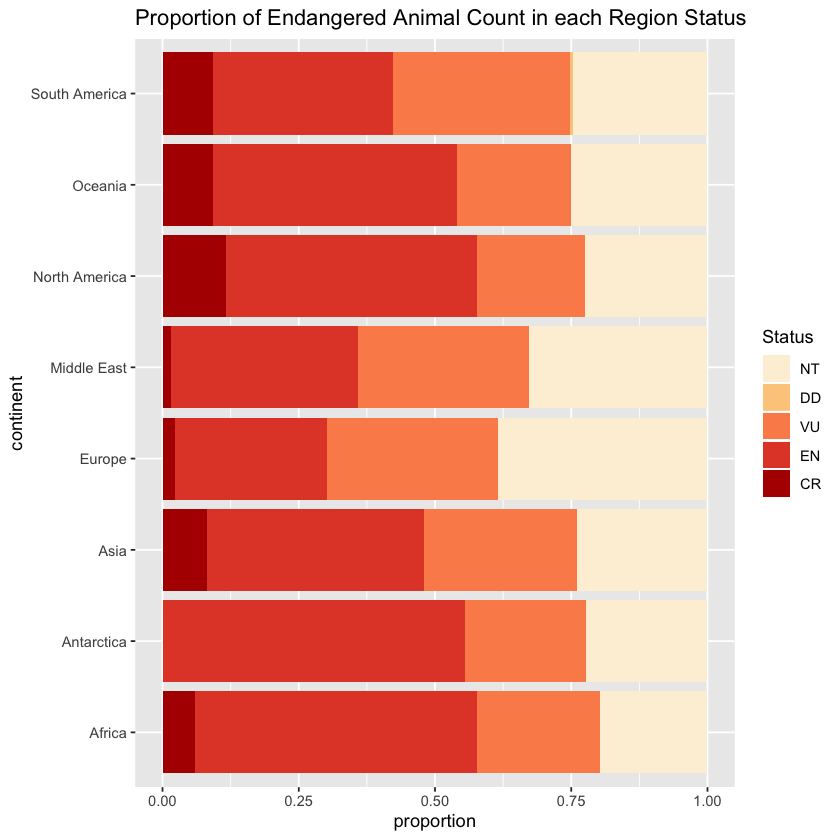

In [57]:
endangered_mammal_animals_plot

In [59]:
ggsave(endangered_mammal_animals_plot,filename = "Plot for endangered mammal animals.jpg",width = 12,height = 9)

In [60]:
Status_total$Area <-as.factor(Status_total$Area)
Status_total <- Status_total %>%
  mutate(proportion = total/sum(total)) %>%
  arrange(desc(proportion))

In [61]:
#reorder origin by ascending count
Status_total$Area <- reorder(Status_total$Area, Status_total$proportion)

In [62]:
endangered_mammal_animals_plot2 <- Status_total %>%
  ggplot(aes(x="", y=proportion, fill=Area))+
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start=0) +
  scale_fill_brewer(palette="OrRd") +
  ggtitle("Proportion of Endangered Animal Count in each Region") +
  theme(plot.title = element_text(hjust = 0.5), axis.title.x =element_blank())

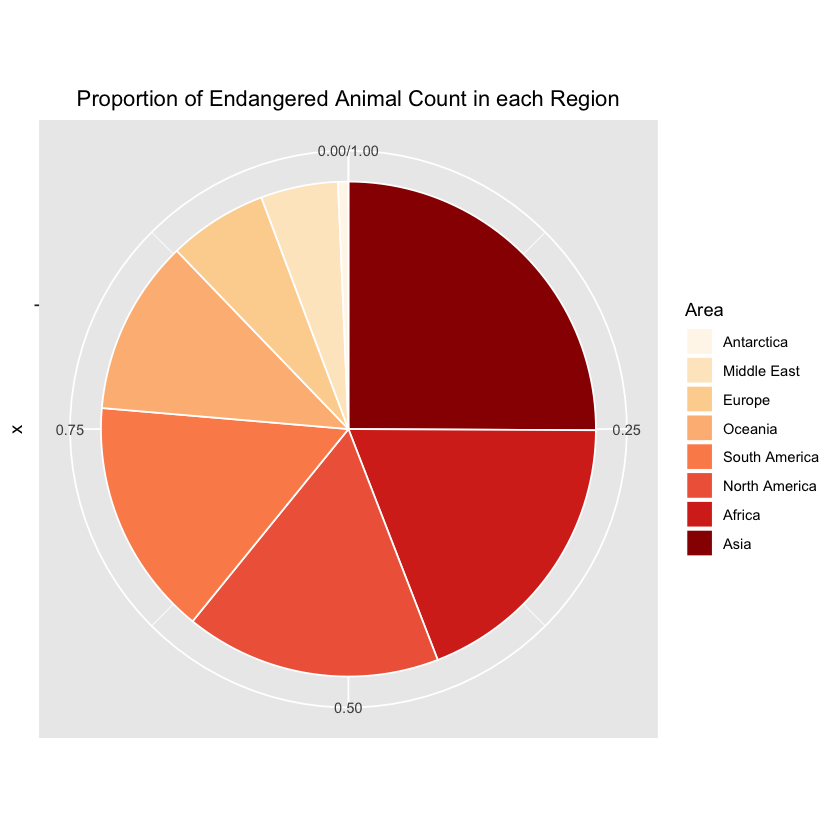

In [63]:
endangered_mammal_animals_plot2

In [64]:
ggsave(endangered_mammal_animals_plot2,filename = "Pie chart-endangered mammal animals.jpg",width = 12,height = 9)